### use GPA and GRE number to predict the outcome of application
* Use Logistic regression to predict categorical outcome
* Specify a threshold (subjective): discrimination threshold
* logistic function, which is a version of the linear function that is adapted for classification.
* scikit-learn LogisticRegression class: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

admissions=pd.read_csv('admissions.csv')

plt.scatter(admissions.gpa,admissions.admit)
plt.show()

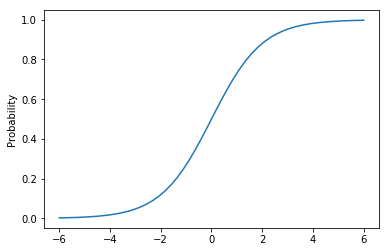

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])

from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])


In [ ]:
# Return the predict probability instead of the label
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

pred_probs=logistic_model.predict_proba(admissions[["gpa"]])

plt.scatter(admissions["gpa"],pred_probs[:,1])

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

fitted_labels=logistic_model.predict(admissions[["gpa"]])
print(fitted_labels)


### Evaluating bindary classifiers:
* Accuracy: what fractions of predicted-label are correct = #corrected prediction/#observation
* Sensitivity: True Positive Rate (TPR) = True positive / (true+ & false-) >> How effective is this model at identifying positive outcomes?
* Specifity: Specificity or True Negative Rate - The proportion of applicants that were correctly rejected >> oppositve of TPR >> TNR
* 



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

admissions = pd.read_csv("admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])

admissions["predicted_label"]=model.predict(admissions[["gpa"]])
print(admissions["predicted_label"].value_counts())

print(admissions.head(5))

In [ ]:
admissions["actual_label"] = admissions["admit"]
matches = admissions["predicted_label"] == admissions["actual_label"]
correct_predictions = admissions[matches]

print(correct_predictions.head())
accuracy = len(correct_predictions) / len(admissions)
print(accuracy)

In [ ]:
matches_1 = (admissions["predicted_label"] == admissions["actual_label"]) & (admissions["predicted_label"] ==1)
true_positives = admissions[matches_1]

matches_2 = (admissions["predicted_label"] == admissions["actual_label"]) & (admissions["predicted_label"] ==0)
true_negatives = admissions[matches_2]

In [ ]:
## Sensitivity:
# From the previous screen
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

# From the previous screen
false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])

sensitivity=true_positives/(true_positives+false_negatives)



In [ ]:
## Specifity
# From previous screens
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])
false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])

false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])
true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])  

specificity=true_negatives/(false_positives+true_negatives)

### Multiclass classification
* Working on Car-mileage data from https://archive.ics.uci.edu/ml/datasets/Auto+MPG
* Create numerical representation from categorical columns
* Two approaches (1) One-vs-ALL (2) 

In [ ]:
import pandas as pd
cars = pd.read_csv("auto.csv")
unique_regions=cars['origin'].unique()
print(unique_regions)


In [ ]:
# Create Dummy variables for cyclinders and year
dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
cars = pd.concat([cars, dummy_cylinders], axis=1)

dummy_years = pd.get_dummies(cars["year"], prefix="year")
cars = pd.concat([cars, dummy_years], axis=1)

cars.drop(['year','cylinders'],axis=1,inplace=True)
cars.head(5)

In [ ]:
from sklearn.linear_model import LogisticRegression

unique_origins = cars["origin"].unique()
unique_origins.sort()

models = {}

for origin in unique_origins:
    features = [c for c in train.columns if c.startswith("cyl") or c.startswith("year")]
    X=train[features]
    y=train['origin']==origin
    logre=LogisticRegression()
    logre.fit(train[features], train['origin'])
    
    models[origin]=logre


In [ ]:
testing_probs = pd.DataFrame(columns=unique_origins)

for origin in unique_origins:
    X_test=test[features]
    testing_probs[origin]=models[origin].predict_proba(X_test)[:,1]

In [ ]:
predicted_origins=testing_probs.idxmax(axis=1)
print(predicted_origins)

### Notes
* In these instances, it is always safer to treat discrete values as categorical variables. (Treat Year as categorical)
* So category 1 vs the other, and find the highest probability of which origin for all three columns
* First thing in any DS problems: (1) Regression or (2) Classification
* The danger of overfitting: bias vs variance
* Bias describes error that results in bad assumptions about the learning algorithm. 
* Variance describes error that occurs because of the variability of a model's predicted values.
* We want low bias and low variance >> always a tradeoff
* Find the Optimum model complexity


### Variance vs Bias tradeoff

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def train_and_test(cols):
    model=LinearRegression()
    model.fit(filtered_cars[cols],filtered_cars['mpg'])
    predictions=model.predict(filtered_cars[cols])
    variance=np.var(predictions)
    mse=mean_squared_error(predictions,filtered_cars['mpg'])
    return(mse,variance)
    
cyl_mse,cyl_var=train_and_test(['cylinders'])
weight_mse,weight_var=train_and_test(['weight'])

In [ ]:
# Our implementation for train_and_test, takes in a list of strings.
def train_and_test(cols):
    # Split into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    # Make predictions on training set.
    predictions = lr.predict(features)
    # Compute MSE and Variance.
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)

one_mse, one_var = train_and_test(["cylinders"])

two_mse,two_var=train_and_test(["cylinders","displacement"])
three_mse,three_var=train_and_test(["cylinders","displacement","horsepower"])
four_mse,four_var=train_and_test(["cylinders","displacement","horsepower","weight"])
five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

def train_and_cross_val(cols):
    features=filtered_cars[cols]
    target=filtered_cars['mpg']
    
    variance_values=[]
    mse_values=[]
    
    
    kf=KFold(n_splits=10, random_state=3, shuffle=True)
    
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        model=LinearRegression()
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        mse=mean_squared_error(predictions,y_test)
        variance=np.var(predictions)
        
        mse_values.append(mse)
        variance_values.append(variance)
        
        
    avg_mse=np.mean(mse_values)
    avg_var=np.mean(variance_values)
    return(avg_mse, avg_var)

two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])
    

In [ ]:
# We've hidden the `train_and_cross_val` function to save space but you can still call the function!
import matplotlib.pyplot as plt
        
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

x=range(2,8)
y1=[two_mse,three_mse,four_mse,five_mse,six_mse,seven_mse]
y2=[two_var,three_var,four_var,five_var,six_var,seven_var]

plt.scatter(x,y1,color='red')
plt.scatter(x,y2,color='blue')
plt.show()



### Notes
* A good way to detect if your model is overfitting is to compare the in-sample error and the out-of-sample error, or the training error with the test error.
* 